In [61]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

## Frequentist Interval Estimation via Neyman Construction

<p style="font-size: 16px; width: 50%;">
The goal of <emph>interval estimation</emph> in frequentist inference is the construction of intervals from observed data with definite statistical properties. Since the data is the result of a stochastic process, the intervals are also stochastic objects. This is similar to how a maximum-likelihood estimate, which is also constructed from the observed data is a random object.
</p>

### Coverage of parameter values

<p style="font-size: 16px; width: 50%;">
An important property of an interval $y$ constructed from data $x$ $y = (x) = [a,b]$ is whether a given parameter value is within the interval bounds in which case we say the interval "covers" the value.
</p>
<p style="font-size: 16px; width: 50%;">
Given an ensemble of data $x \sim p(x|\mu)$ an interesting number is the number of intervals (one constructed from each draw $x$) which cover the parameter value from which the data originated -- this is the coverage of $\mu$.
</p>
<p style="font-size: 16px; width: 50%;">
In interval estimation the goal is to find a procedure to such intervals that yields a known coverage value. A tyical example are $95\%$ confidence intervals, where the probability of observing data, whose corresponding interval covers the true value of the underlying parameter is 95%.
</p>

### Neyman Construction - Intervals from a series of hypothesis tests
<p style="font-size: 16px; width: 50%;">
To construct intervals for  $x$, we need to decide whether a given value $\mu$ is inside the $x$'s interval, i.e. we need a map
$$(x,\mu) \to \{\text{in interval},\text{out of internal}\} $$
This is nothing but a hypothesis test, in which for some $\mu$ we either decide for a given $x$ whether to accept or reject the model with pararmeter $\mu$
$$(x,\mu) \to \{\text{accept},\text{reject}\} $$
<br/>
In both cases it's a map $(x,\mu) \to \{\text{yes},\text{no}\}$!. This means that given a hypothesis testing procedure, we can construct intervals of $x$ by defining it as the union of all parameter values for which the hypothesis is not rejected based on the observation of $x$.
The coverage follows directly: if for data $x~p(x|mu)$
Given a model $p(x|\mu)$ the set of x-value which case the hypothesis $\mu$ to be accepted by constuction also have assoociated intervals in which $\mu$ is included. If 95% of values $x$ cause the model to be accepted, that immediatly implies 95% of intervals include $\mu$.
</p>


 < a standard neyman construction plot here >

### Right-tail Hypothesis Tests

Let's look at a few ways to do hypothesis tests (and thus construct intervals). As usual we will conduct hypothesis tests for a given parameter $\mu$ by defining a test statistic  $t_\mu(x)$


$$t_\mu(x) = \log\frac{L(\mu,\hat{\hat{\theta}}|x)}{L(\hat{\mu},\hat{\theta}|x)}$$

#### Asymptotic Behavior of the Profile Likelhoood (Wald)

Asymptotically, the $t_\mu(x)$ can be put into relation to the best-fit value $\hat{\mu}(x)$. Maximum likelhood estimates are asymptotically normal. Meaning that they are normally distributed around the true value of parameter

$$\mu \sim N(\mu',\sigma)$$

and this relation holds

$$t_\mu = \frac{(\mu-\hat\mu)^2}{\sigma^2}$$

We can look at those two distributions change into each other by loooking at a joint plot

In [62]:
def jointplot(mu,teststat,tcut = 4):
    f,axarr = plt.subplots(2,2)

    muhat_over_sigma = np.random.normal(mu,size = 1000)
    
    linear = np.linspace(-5,5)
    tmulin = teststat(mu,linear)
    
    tmu = teststat(mu,muhat_over_sigma)

    ax = axarr[1,1]
    ax.set_xlim(-5.5,5.5)

    bins = np.linspace(-10,10,41)
    ax.hist(muhat_over_sigma, density = False,bins = bins)
    
    ax.hist(muhat_over_sigma[tmu>tcut], density = False,bins = bins)

    ax = axarr[0,1]
    ax.set_ylim(-1,20)
    ax.set_xlim(-5.5,5.5)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.scatter(muhat_over_sigma,tmu)
    ax.scatter(muhat_over_sigma[tmu>tcut],tmu[tmu>tcut])
    ax.plot(linear,tmulin)

    ax = axarr[0,0]
    bins = np.linspace(0,20,21)
    ax.hist(tmu, orientation='horizontal', bins = bins, density = False)
    ax.hist(tmu[tmu>tcut], orientation='horizontal', bins = bins, density = False)
    ax.set_ylim(-1,20)
    ax.set_xscale('log')
    ax.set_xlim(100000,1e-1)
    axarr[1,0].axis('off')
    f.set_size_inches(5,5)

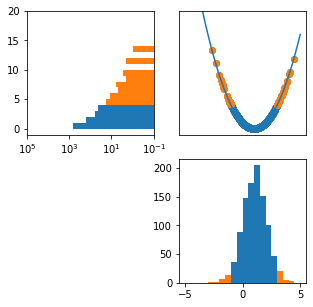

In [63]:
def tmu_teststat(mu,muhat):
    a = (mu-muhat)**2
    return a

jointplot(1.0,tmu_teststat)

Assuming the asymptotic normality we assume $\hat{\mu} = \mathcal{N}(\mu',\sigma)$ the normal distribution changes into a $\chi^2$ distribution.

There are several important variation to this basic test statistic:

For models in which the parameter we want to hypothesis tests on is bounded $\mu >= 0$ we use

$$
\tilde{t}_\mu(x)=
\begin{cases}
\log\frac{L(\mu,\hat{\hat{\theta}}|x)}{L(\hat{\mu},\hat{\theta}|x)}\;\text{if}\;\hat{\mu}>=0\\ 
\log\frac{L(\mu,\hat{\hat{\theta}}|x)}{L(0,\hat{\theta}|x)}\;\text{if}\;\hat{\mu}<0
\end{cases}
$$

Using the asymptotic approximation and $\log\frac{L(\mu,\hat{\hat{\theta}}|x)}{L(0,\hat{\theta}|x)} = \log\frac{L(\mu,\hat{\hat{\theta}}|x)}{L(\hat{\mu},\hat{\theta}|x)} - \log\frac{L(0,\hat{\hat{\theta}}|x)}{L(\hat{\mu},\hat{\theta}|x)}$


$$
\tilde{t}_\mu(x)=
\begin{cases}
\frac{(\mu-\hat\mu)^2}{\sigma^2}\;\text{if}\;\hat{\mu}>=0\\ 
\frac{(\mu-\hat\mu)^2}{\sigma^2} - \frac{(0-\hat\mu)^2}{\sigma^2} = \frac{(\mu-\hat\mu)^2-\hat\mu^2}{\sigma^2}\;\text{if}\;\hat{\mu}<0
\end{cases}
$$


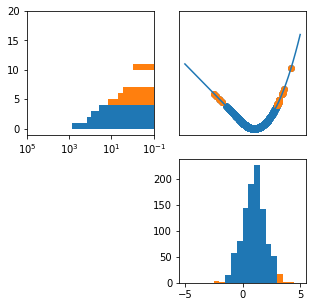

In [53]:
def tmu_tilde_teststat(mu,muhat):
    a = tmu_teststat(mu,muhat)

    b = (0-muhat)**2
    r = np.where(muhat<0,a-b,a)
    return r

jointplot(1.0,tmu_tilde_teststat)

upper

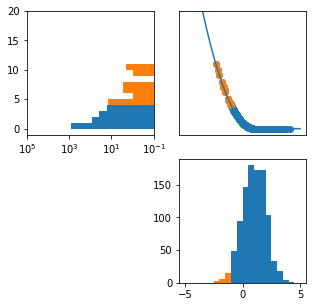

In [54]:
def qmu_teststat(mu,muhat):
    r = tmu_teststat(mu,muhat)
    zero = np.zeros_like(r)
    r = np.where(muhat>mu,zero,r)
    return r

jointplot(1.0,qmu_teststat)

upper bounded

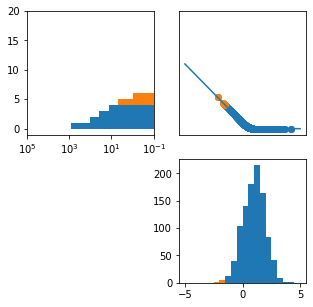

In [55]:
def qmu_tilde_teststat(mu,muhat):
    r = tmu_tilde_teststat(mu,muhat)
    zero = np.zeros_like(r)
    r = np.where(muhat>mu,zero,r)
    return r

jointplot(1.0,qmu_tilde_teststat)

Continue

In [56]:
def get_interval(mu,level,teststat):
    muhat = np.asarray([-1000,-900] + np.linspace(-50,50,5000).tolist() + [900,1000])

    x = muhat-mu
    q = teststat(mu,muhat)

    a = x[np.argmax(q<level)]
    b = x[::-1][np.argmax(q[::-1]<level)]

    size = scipy.stats.norm.cdf(a) + 1-scipy.stats.norm.cdf(b)
    return x,q,a,b,size

def find_interval_for_size(mu,target_size,teststat):
    for level in np.linspace(25,0,5001):
        result = x,q,a,b,size = get_interval(mu,level,teststat)
        result = list(result)
        if size > target_size:
            break
    result.append(level)
    return result

In [57]:
def plot_teststat(ax,min_mu,teststat):
    muhat = np.linspace(-50,50,10000)

    for mu in np.linspace(min_mu,5,21):
        q = teststat(mu,muhat)
        ax.plot(muhat-mu,q)

    ax.set_xlim(-5,5)
    ax.set_ylim(-1,25)
    
def plot_oneinterval(ax,mu,size,teststat):
    x,q,a,b,size ,level = find_interval_for_size(mu,size, teststat)
    ax.plot(x,q)
    ax.vlines([a,b],0,25)
    ax.hlines([level],-20,20)
    ax.set_ylim(0,16)
    ax.set_xlim(-5,5)

    
#mu^-mu = c
#mu = mu +c
def plot_neyman_construction(ax,hypos,bounds,delta = True):
    if delta:
        ax.plot(hypos+bounds[:,0],hypos)
        ax.plot(hypos+bounds[:,1],hypos)
    else:
        ax.plot(bounds[:,0],hypos)
        ax.plot(bounds[:,1],hypos)
    ax.set_xlim(-5,5)
    ax.set_ylim(min_mu,max_mu)
    colors = ['r','b','k','g','y']
    if delta:
        ax.vlines([-2,-1,0,1,2],-5,5, colors = colors)
    else:
        deltas = np.linspace(-5,5)
        for n,c in zip([-2,-1,0,1,2],colors):
            ax.plot(deltas,n-deltas,c = c)
        pass

def plot_cuts(ax,hypos,intervals,teststat):
    ax.plot(hypos,intervals[:,-1])
    ax.set_ylim(0,4)
    
    colors = ['r','b','k','g','y']
    for n,c in zip([-2,-1,0,1,2],colors):
        ax.plot(hypos,teststat(hypos,n),c=c)    

In [58]:
min_mu,max_mu,myteststat = 0,5, tmu_tilde_teststat
# min_mu,max_mu,myteststat = 0,5, qmu_tilde_teststat
# min_mu,max_mu,myteststat = -5,5, tmu_teststat
# min_mu,max_mu,myteststat = -5,5, qmu_teststat

hypos = np.linspace(min_mu,max_mu,15)
intervals = np.asarray([find_interval_for_size(mu,0.05,myteststat)[2:] for mu in hypos])
bounds = intervals[:,:2]

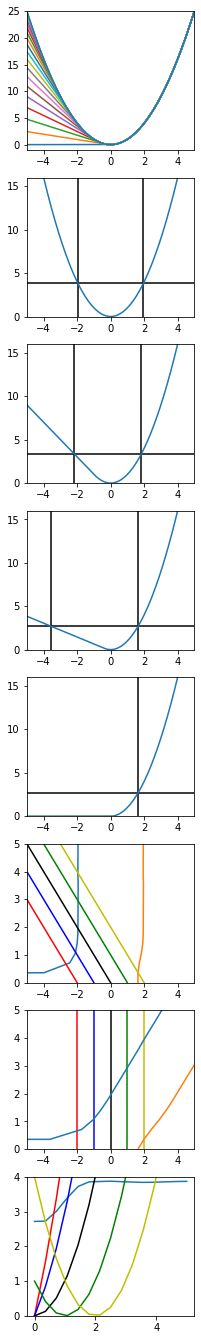

In [44]:
f,axarr = plt.subplots(8,1)
plot_teststat(axarr[0],min_mu,myteststat)
plot_oneinterval(axarr[1],10.0,0.05,myteststat)
plot_oneinterval(axarr[2],1.0,0.05,myteststat)
plot_oneinterval(axarr[3],0.4,0.05,myteststat)
plot_oneinterval(axarr[4],0.0,0.05,myteststat)
plot_neyman_construction(axarr[5],hypos,bounds,delta = False)
plot_neyman_construction(axarr[6],hypos,bounds)
plot_cuts(axarr[7],hypos,intervals,myteststat)
f.set_size_inches(3,24)